# Assignment 1 - Single View Geometry Part B

Team Ironix:
<br>
Iva Ilcheva - ilchei@usi.ch<br>
Reinard Lazuardi Kuwandy - kuwanr@usi.ch

In [1]:
import time
import numpy as np
import matplotlib
from numpy import cross
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [2]:
from utils import select_points, draw_line, imwarpLinear, bilinear_interpolate, create_A, homographyEstimation

In [3]:
import pprint
pp = pprint.PrettyPrinter()

### Prepare image and define points

In [4]:
%matplotlib inline
imgS = plt.imread("S.png")
imgI = plt.imread("I.png")

In [5]:
# points to estimate the homography
[a,b,c,d] = [[212.20275565, 590.55690218,   1.        ],
             [936.74500457, 592.06010187,   1.        ],
             [213.70595533, 187.69938618,   1.        ],
             [936.74500457, 189.20258587,   1.        ]]


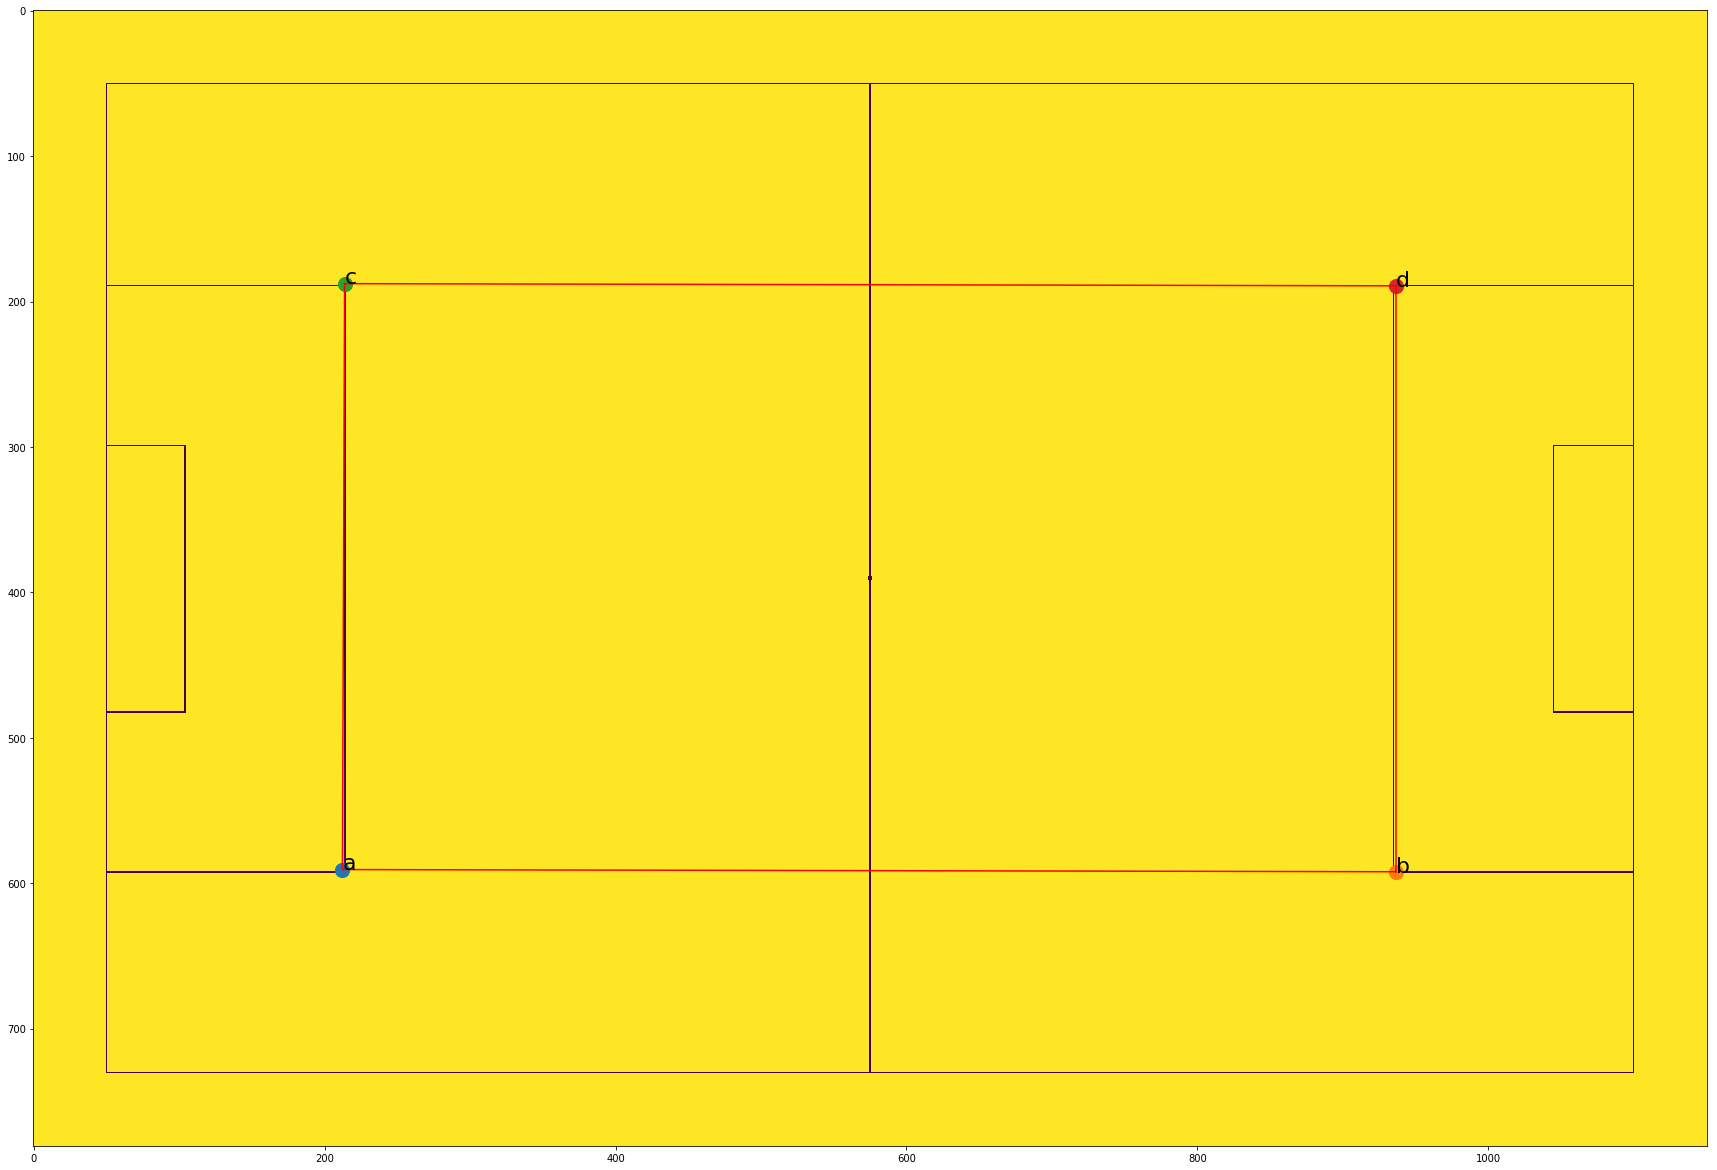

In [6]:
%matplotlib inline

plt.subplots(1, 1, figsize = (30, 30))
plt.rcParams.update({'font.size': 22})
plt.imshow(imgS)
plt.scatter(a[0],a[1], s=200)
plt.annotate('a',(a[:2]) )
plt.scatter(b[0],b[1], s=200)
plt.annotate('b', b[:2])
plt.scatter(c[0],c[1], s=200)
plt.annotate('c', c[:2])
plt.scatter(d[0],d[1], s=200)
plt.annotate('d', d[:2])
draw_line(a, b, 'r')
draw_line(c, d, 'r')
draw_line(a, c, 'r')
draw_line(b, d, 'r')

plt.show()

In [7]:
[aP, bP, cP, dP]= [[102.36613465, 527.33724851,   1.        ],
                    [512.39198606, 707.17314825,   1.        ],
                    [453.40581095, 464.0350118 ,   1.        ],
                     [965.57845341, 548.91755648,   1.        ]]
xP = [aP, bP, cP, dP]
print("xP :")
pp.pprint(xP)

xP :
[[102.36613465, 527.33724851, 1.0],
 [512.39198606, 707.17314825, 1.0],
 [453.40581095, 464.0350118, 1.0],
 [965.57845341, 548.91755648, 1.0]]


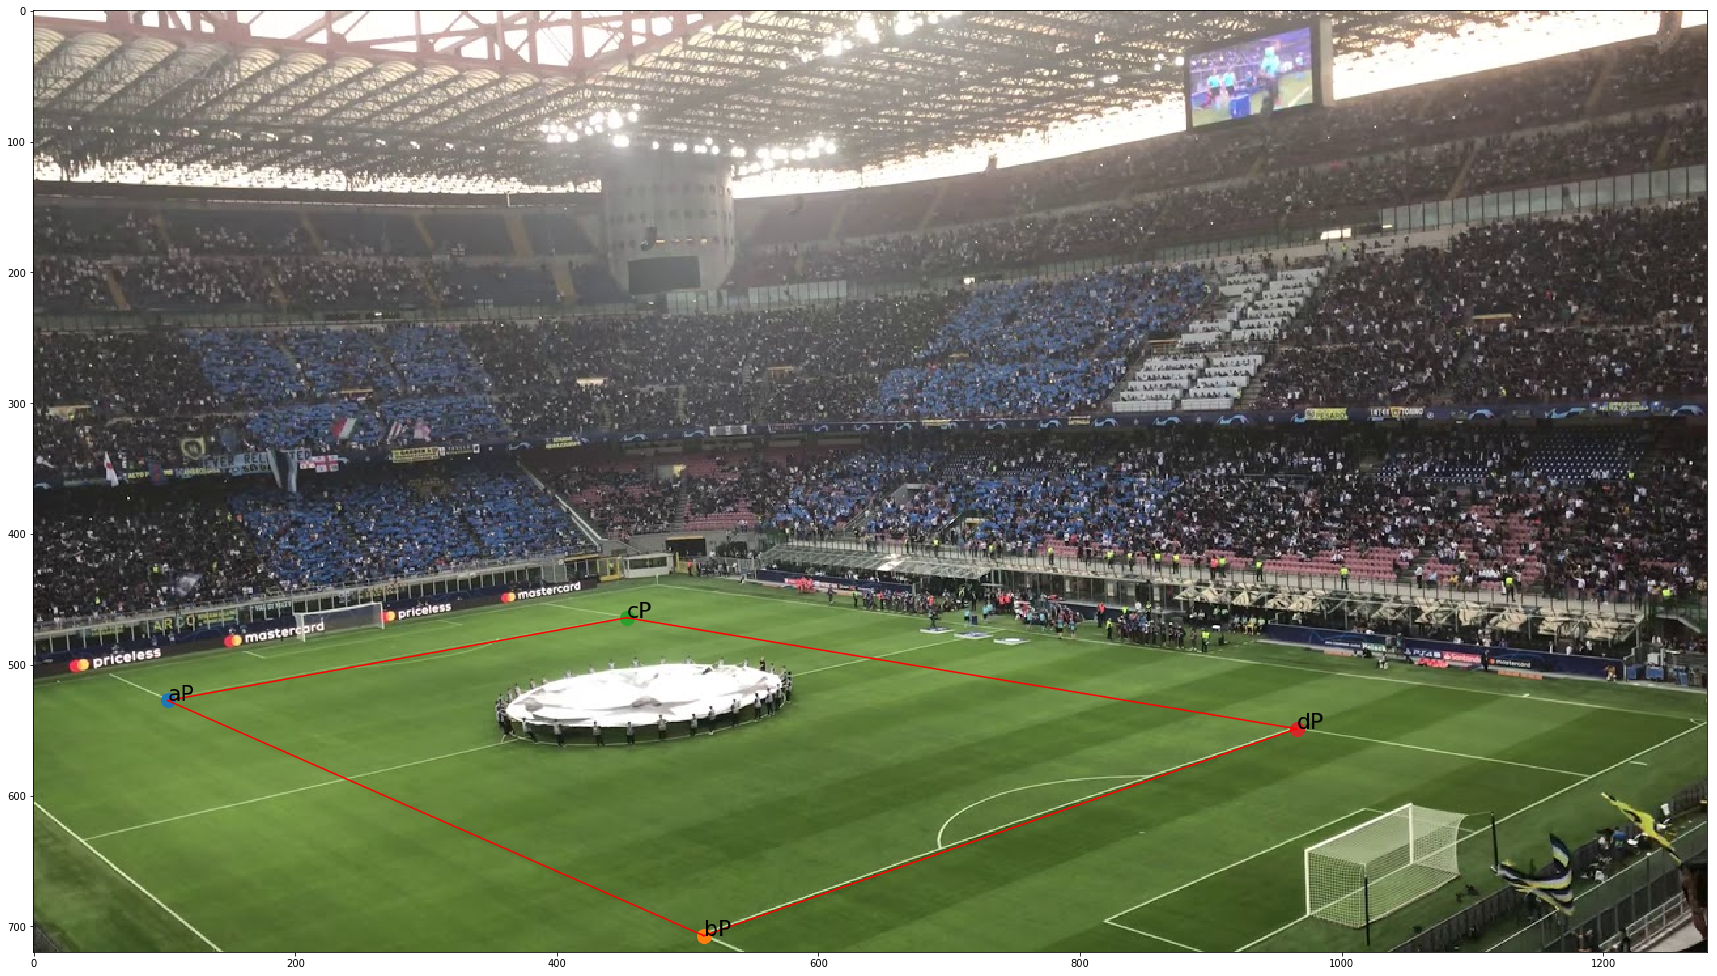

In [8]:
%matplotlib inline

plt.subplots(1, 1, figsize = (30, 30))
plt.rcParams.update({'font.size': 22})
plt.imshow(imgI)
plt.scatter(aP[0],aP[1], s=200)
plt.annotate('aP',(aP[:2]) )
plt.scatter(bP[0],bP[1], s=200)
plt.annotate('bP', bP[:2])
plt.scatter(cP[0],cP[1], s=200)
plt.annotate('cP', cP[:2])
plt.scatter(dP[0],dP[1], s=200)
plt.annotate('dP', dP[:2])
draw_line(aP, bP, 'r')
draw_line(cP, dP, 'r')
draw_line(aP, cP, 'r')
draw_line(bP, dP, 'r')

plt.show()

## Retrieve lines from image S ##

In [9]:
lab = cross(a,b)
lab /= lab[2]

lac = cross(a,c)
lac /= lac[2]

lbd = cross(b,d)
lbd /= lbd[2]

lcd = cross(c,d)
lcd /= lcd[2]

l = [lab, lac, lbd, lcd]

## Retrieve corresponding lines from image I ##

In [10]:
labP = cross(aP,bP)
labP /= labP[2]

lacP = cross(aP,cP)
lacP /= lacP[2]

lbdP = cross(bP,dP)
lbdP /= lbdP[2]

lcdP = cross(cP,dP)
lcdP /= lcdP[2]

lP = [labP, lacP, lbdP, lcdP]

### Estimate line to line homography ###

In [11]:
H = homographyEstimation(l,lP)
print("H :")
pp.pprint(H)

H :
array([[-7.60156520e-01,  3.56502187e-01, -2.07565851e-04],
       [-4.64161452e+00, -3.00882434e+00, -3.22563498e-03],
       [ 2.37224809e+03,  1.12364452e+03,  1.00000000e+00]])


## How would we then estimate each line new line map: ##

Let's assume given line lij, lkl, ljl, lef

In [12]:
lij = [ 3.25889790e-05, -1.69462691e-03,  1.00000000e+00]
lkl = [-0.        , -0.00527827,  1.        ]
ljl = [-0.00467535, -0.        ,  1.        ]
lef = [-0.         ,-0.00137028,  1.        ]
#lijP = array([ 0.00101164, -0.00208253,  1.        ])

## Line tranformation

In [13]:
def drawLine(l,I):
    topRow = [0, 1, -I.shape[0] - 500]
    bottomRow = [0, 1, -1]
    intTop = cross(l,topRow)
    intTop /= intTop[2]
    intBottom = cross(l,bottomRow)
    intBottom /= intBottom[2]
    print(intBottom, intTop)
    
    draw_line(intBottom, intTop, 'r')

### Transformation line from the book and the slide

l′ = (H.inv).T @ l.

In [14]:
from numpy.linalg import inv

Hinv = inv(H)

lijP = Hinv.T @ lij
lijP = lijP/lijP[2]

lklP = Hinv.T @ lkl
lklP = lklP/lklP[2]

ljlP = Hinv.T @ ljl
ljlP = ljlP/ljlP[2]

lefP = Hinv.T @ lef
lefP = lefP/lefP[2]

In [15]:
print("lijP :")
pp.pprint(lijP)

print("lklP :")
pp.pprint(lklP)

print("ljlP :")
pp.pprint(ljlP)

print("lefP :")
pp.pprint(lefP)

lijP :
array([487.61909876, 431.2252268 ,   1.        ])
lklP :
array([487.62116342, 431.22488521,   1.        ])
ljlP :
array([487.61634795, 431.22517808,   1.        ])
lefP :
array([487.61889854, 431.22525613,   1.        ])


In [16]:
#### Let's plot those 3 lines to image
# fig, ax = plt.subplots(1, 1, figsize = (30, 30))
# plt.rcParams.update({'font.size': 22})
# plt.imshow(imgI)
# ax.axis([-1000, 2000,1000, -500])
# drawLine(lijP, imgI)
# drawLine(lklP, imgI)
# drawLine(ljlP, imgI)
# drawLine(lefP, imgI)